In [22]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [23]:
dta=[90,82,100,113,155,186,86,81,180,92,93,131,189,155,127,
161,122,180,212,237,200,194,129,139,179,212,204,143,
131,113,190,221,138,216,174,191,208,222,167,123,132,
227,226,135,190,107,180,295,282,161,238,187,250,
230,170,197,218,168,211,146,150,210,312,125,219,173,
242,202,193,220,246,120]
dta=np.array(dta,dtype=np.float)

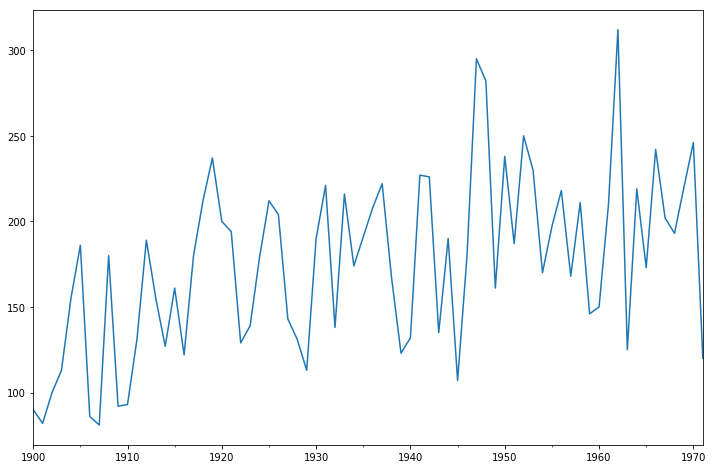

In [24]:
dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1900','1971'))
dta.plot(figsize=(12,8))
plt.show()

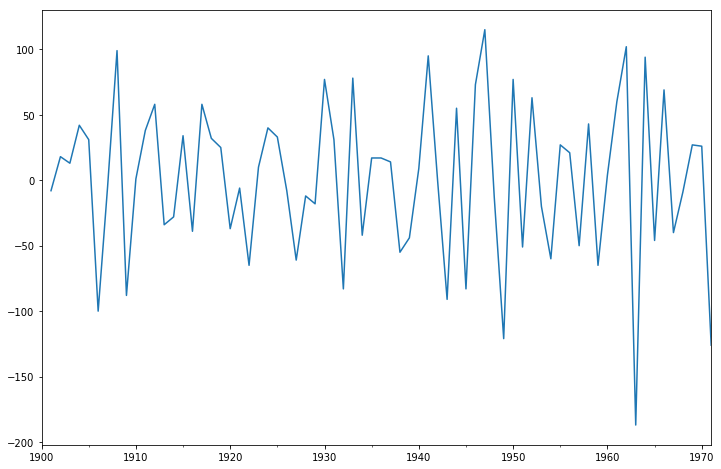

In [25]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)
plt.show()

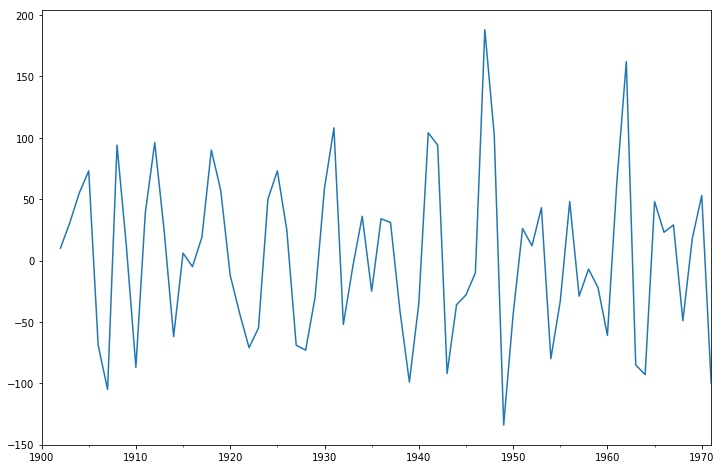

In [26]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax1)
plt.show()

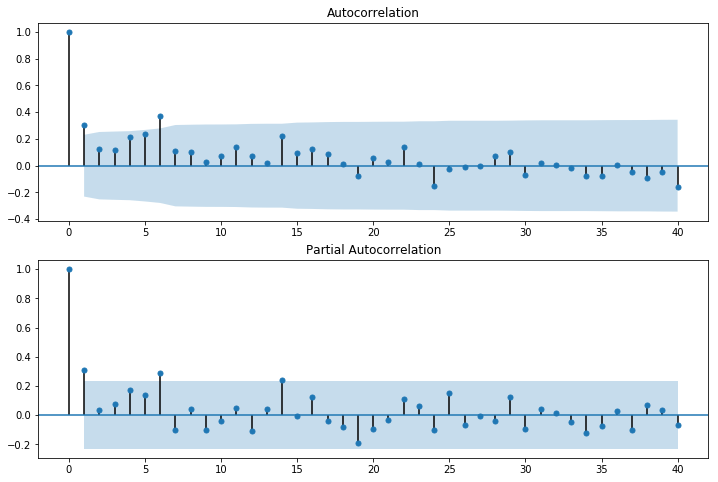

In [27]:
# dta= dta.diff(1)
dta.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)
plt.show()

In [35]:
arima_mod_01 = arma = sm.tsa.ARIMA(dta,(0,2,1)).fit()
print(arma.aic,arma.bic,arma.hqic)
arima_mod_61 = arma = sm.tsa.ARIMA(dta,(6,2,1)).fit()
print(arma.aic,arma.bic,arma.hqic)

782.9573137128375 789.702799439 785.63670287
756.7519683317269 776.98842551 764.790135804


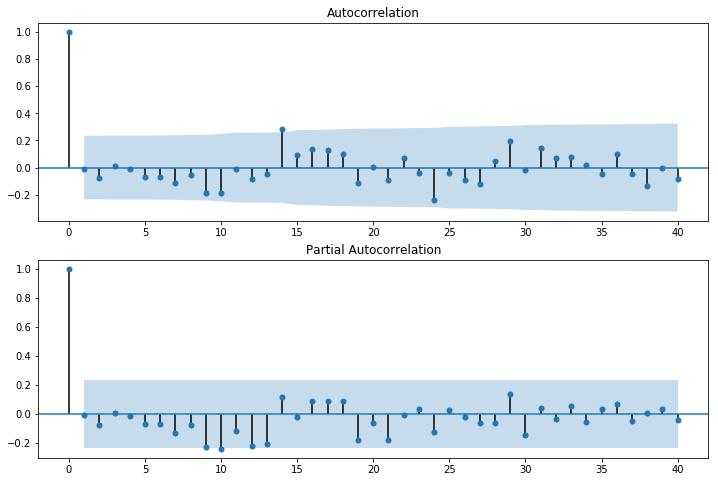

In [36]:
resid = arima_mod_61.resid

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [37]:
print(sm.stats.durbin_watson(arima_mod_61.resid.values))

1.96604781878


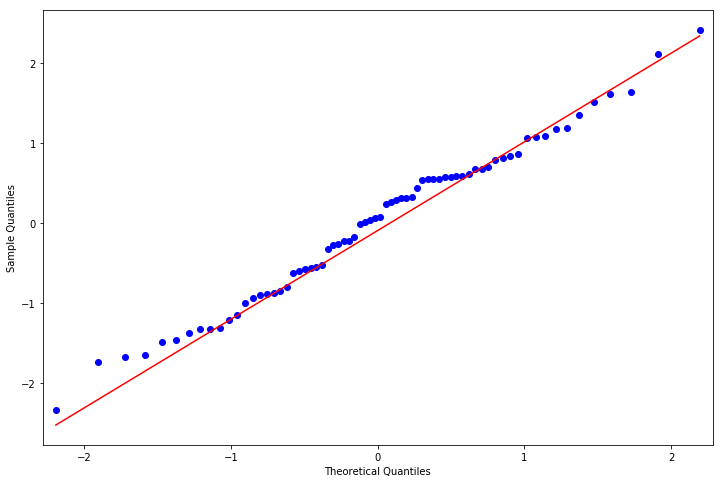

In [38]:
resid = arima_mod_61.resid#残差
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [39]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.007275   0.003866  0.950421
2.0  -0.078731   0.463291  0.793227
3.0   0.009557   0.470162  0.925396
4.0  -0.011142   0.479642  0.975452
5.0  -0.068571   0.844221  0.974127
6.0  -0.066935   1.197044  0.977030
7.0  -0.116872   2.289777  0.942079
8.0  -0.058191   2.565039  0.958629
9.0  -0.191026   5.580041  0.781102
10.0 -0.184150   8.428585  0.587049
11.0 -0.008449   8.434682  0.673917
12.0 -0.086384   9.083116  0.695815
13.0 -0.048593   9.291906  0.750557
14.0  0.280852  16.390897  0.290090
15.0  0.094495  17.209151  0.306516
16.0  0.136114  18.938341  0.271874
17.0  0.130181  20.549910  0.247072
18.0  0.100003  21.519194  0.254032
19.0 -0.117371  22.880571  0.242643
20.0  0.004584  22.882688  0.294591
21.0 -0.087980  23.678858  0.308877
22.0  0.068240  24.167810  0.338495
23.0 -0.041338  24.351057  0.384588
24.0 -0.235690  30.437377  0.170675
25.0 -0.042054  30.635454  0.201375
26.0 -0.088211  31.526746  0

1971-12-31   -70.202692
1972-12-31    56.480320
1973-12-31   -19.846172
1974-12-31     8.653119
1975-12-31     4.738352
1976-12-31     0.031329
1977-12-31   -21.902799
1978-12-31    17.628959
1979-12-31    -2.730418
1980-12-31     1.892603
Freq: A-DEC, dtype: float64


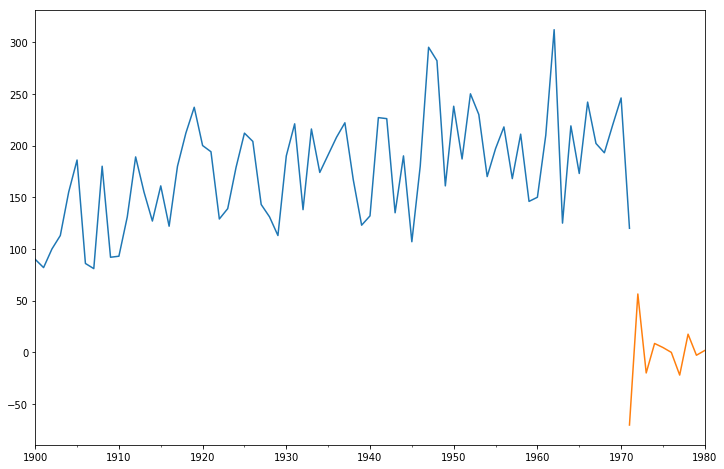

In [40]:
predict_sunspots = arima_mod_61.predict('1971', '1980', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1900':].plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()